In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [2]:
# Time Series Data Path
ts_data_path = '/Users/prim232/gitrepos/stitches_in_r/R/inst/shinyApp/python_curation/extracted_timeseries/land_regions_ts'

In [3]:
# Read example time series
pr_data = pd.read_csv(os.path.join(ts_data_path, 'IPCC_land_regions_pr_ACCESS-CM2_timeseries_1980-2099.csv'))

In [4]:
ssp245_r1i1p1f1 = pr_data[(pr_data['experiment'] == 'ssp245') & (pr_data['ensemble'] == 'r1i1p1f1') & (pr_data['acronym'] =='NWN')]
ssp245_r1i1p1f1

,pr,year,esm,experiment,ensemble,variable,continent,type,name,acronym,value
25800,NaN,2015,ACCESS-CM2,ssp245,r1i1p1f1,pr,NORTH-AMERICA,Land,N.W.North-America,NWN,0.000025
25843,NaN,2016,ACCESS-CM2,ssp245,r1i1p1f1,pr,NORTH-AMERICA,Land,N.W.North-America,NWN,0.000025
25886,NaN,2017,ACCESS-CM2,ssp245,r1i1p1f1,pr,NORTH-AMERICA,Land,N.W.North-America,NWN,0.000025
25929,NaN,2018,ACCESS-CM2,ssp245,r1i1p1f1,pr,NORTH-AMERICA,Land,N.W.North-America,NWN,0.000024
25972,NaN,2019,ACCESS-CM2,ssp245,r1i1p1f1,pr,NORTH-AMERICA,Land,N.W.North-America,NWN,0.000025
...,...,...,...,...,...,...,...,...,...,...,...
29240,NaN,2095,ACCESS-CM2,ssp245,r1i1p1f1,pr,NORTH-AMERICA,Land,N.W.North-America,NWN,0.000028
29283,NaN,2096,ACCESS-CM2,ssp245,r1i1p1f1,pr,NORTH-AMERICA,Land,N.W.North-America,NWN,0.000029
29326,NaN,2097,ACCESS-CM2,ssp245,r1i1p1f1,pr,NORTH-AMERICA,Land,N.W.North-America,NWN,0.000027
29369,NaN,2098,ACCESS-CM2,ssp245,r1i1p1f1,pr,NORTH-AMERICA,Land,N.W.North-America,NWN,0.000028


In [5]:
output = sm.nonparametric.lowess(ssp245_r1i1p1f1['value'].values, ssp245_r1i1p1f1['year'].values)
smooth_y = list(zip(*output))[1]
iasd = np.std(smooth_y - ssp245_r1i1p1f1['value'].values )

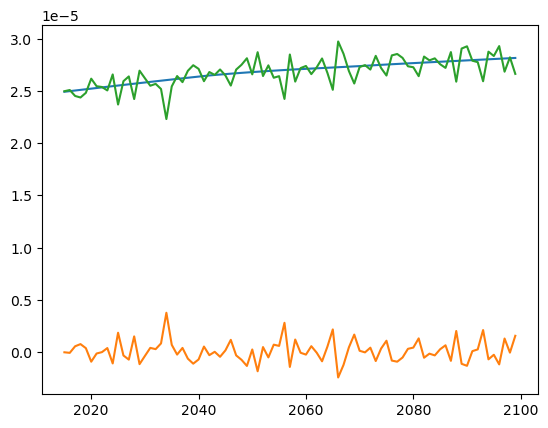

In [6]:
plt.plot(ssp245_r1i1p1f1.year, smooth_y)
plt.plot(ssp245_r1i1p1f1.year, smooth_y - ssp245_r1i1p1f1['value'].values)
plt.plot(ssp245_r1i1p1f1.year, ssp245_r1i1p1f1['value'])

In [7]:
def loess(df):
    try:
        output = sm.nonparametric.lowess(df['value'].values, df['year'].values)
        smooth_y = list(zip(*output))[1]
        iasd = np.std(smooth_y - df['value'].values )
        df = df[['type', 'name']].head(1)
        df['iasd'] = iasd
    except IndexError:
        esm = df['esm'][0,:]
        print(f'Index Out of Range for {esm}')
        
    return df

In [8]:
grouped = pr_data.groupby(
    ['esm', 'experiment', 'ensemble', 'variable', 'acronym']
)
pr_iasd = grouped.apply(loess)
pr_iasd = pr_iasd.reset_index()[['esm', 'experiment', 'ensemble', 'variable', 'type', 'name', 'iasd']]
pr_iasd

,esm,experiment,ensemble,variable,type,name,iasd
0,ACCESS-CM2,historical,r1i1p1f1,pr,Land,Arabian-Peninsula,6.266547e-07
1,ACCESS-CM2,historical,r1i1p1f1,pr,Land,Central-Africa,2.549411e-06
2,ACCESS-CM2,historical,r1i1p1f1,pr,Land-Ocean,Caribbean,6.320920e-06
3,ACCESS-CM2,historical,r1i1p1f1,pr,Land,C.Australia,3.015601e-06
4,ACCESS-CM2,historical,r1i1p1f1,pr,Land,C.North-America,2.406804e-06
...,...,...,...,...,...,...,...
1070,ACCESS-CM2,ssp585,r5i1p1f1,pr,Land,W.C.Asia,2.010519e-06
1071,ACCESS-CM2,ssp585,r5i1p1f1,pr,Land,West&Central-Europe,2.197986e-06
1072,ACCESS-CM2,ssp585,r5i1p1f1,pr,Land,W.North-America,2.840268e-06
1073,ACCESS-CM2,ssp585,r5i1p1f1,pr,Land,W.Southern-Africa,1.907002e-06


# Read In All Time Series

In [9]:
dataframes = [pd.read_csv(os.path.join(ts_data_path, file)) for file in os.listdir(ts_data_path)]
full_data = pd.concat(dataframes)
full_data

,tas,year,esm,experiment,ensemble,variable,continent,type,name,acronym,value,pr,ann_agg
0,NaN,1980,MRI-ESM2-0,historical,r10i1p1f1,tas,NORTH-AMERICA,Land,N.W.North-America,NWN,270.696579,NaN,NaN
1,NaN,1980,MRI-ESM2-0,historical,r10i1p1f1,tas,NORTH-AMERICA,Land,N.E.North-America,NEN,266.334754,NaN,NaN
2,NaN,1980,MRI-ESM2-0,historical,r10i1p1f1,tas,NORTH-AMERICA,Land,W.North-America,WNA,282.077686,NaN,NaN
3,NaN,1980,MRI-ESM2-0,historical,r10i1p1f1,tas,NORTH-AMERICA,Land,C.North-America,CNA,285.535020,NaN,NaN
4,NaN,1980,MRI-ESM2-0,historical,r10i1p1f1,tas,NORTH-AMERICA,Land,E.North-America,ENA,284.469444,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16120,NaN,2099,CMCC-CM2-SR5,ssp585,r1i1p1f1,pr,OCEANIA,Land,N.Australia,NAU,0.000038,NaN,NaN
16121,NaN,2099,CMCC-CM2-SR5,ssp585,r1i1p1f1,pr,OCEANIA,Land,C.Australia,CAU,0.000014,NaN,NaN
16122,NaN,2099,CMCC-CM2-SR5,ssp585,r1i1p1f1,pr,OCEANIA,Land,E.Australia,EAU,0.000029,NaN,NaN
16123,NaN,2099,CMCC-CM2-SR5,ssp585,r1i1p1f1,pr,OCEANIA,Land,S.Australia,SAU,0.000015,NaN,NaN


### Differing Formats
Most data has value column which holds either the pr or tas value. Some files have a dedicated pr or ann_agg column which holds that value. First we make sure that all data has the form which has the value column.

In [10]:
semi_full_data_non_nan = full_data[~np.isnan(full_data['value'])]

In [11]:
pr_data = full_data[np.isnan(full_data['value']) & (~np.isnan(full_data['pr']))]
pr_data['value'] = pr_data['pr']
pr_data

/var/folders/03/82f8dprj20zdn3zkgcd_p1280000gn/T/ipykernel_17769/3726116848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_data['value'] = pr_data['pr']


,tas,year,esm,experiment,ensemble,variable,continent,type,name,acronym,value,pr,ann_agg
0,NaN,1980,MIROC6,historical,r6i1p1f1,pr,NORTH-AMERICA,Land,N.W.North-America,NWN,0.000024,0.000024,NaN
1,NaN,1981,MIROC6,historical,r6i1p1f1,pr,NORTH-AMERICA,Land,N.W.North-America,NWN,0.000024,0.000024,NaN
2,NaN,1982,MIROC6,historical,r6i1p1f1,pr,NORTH-AMERICA,Land,N.W.North-America,NWN,0.000022,0.000022,NaN
3,NaN,1983,MIROC6,historical,r6i1p1f1,pr,NORTH-AMERICA,Land,N.W.North-America,NWN,0.000023,0.000023,NaN
4,NaN,1984,MIROC6,historical,r6i1p1f1,pr,NORTH-AMERICA,Land,N.W.North-America,NWN,0.000025,0.000025,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
484175,NaN,2095,ACCESS-ESM1-5,ssp585,r21i1p1f1,pr,OCEANIA,Land,New-Zealand,NZ,0.000035,0.000035,NaN
484176,NaN,2096,ACCESS-ESM1-5,ssp585,r21i1p1f1,pr,OCEANIA,Land,New-Zealand,NZ,0.000034,0.000034,NaN
484177,NaN,2097,ACCESS-ESM1-5,ssp585,r21i1p1f1,pr,OCEANIA,Land,New-Zealand,NZ,0.000038,0.000038,NaN
484178,NaN,2098,ACCESS-ESM1-5,ssp585,r21i1p1f1,pr,OCEANIA,Land,New-Zealand,NZ,0.000038,0.000038,NaN


In [12]:
tas_data = full_data[np.isnan(full_data['value']) & (~np.isnan(full_data['ann_agg']))]
tas_data['value'] = tas_data['ann_agg']
tas_data

/var/folders/03/82f8dprj20zdn3zkgcd_p1280000gn/T/ipykernel_17769/3579803007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tas_data['value'] = tas_data['ann_agg']


,tas,year,esm,experiment,ensemble,variable,continent,type,name,acronym,value,pr,ann_agg
0,NaN,1980,ACCESS-ESM1-5,historical,r1i1p1f1,tas,NORTH-AMERICA,Land,N.W.North-America,NWN,269.381756,NaN,269.381756
1,NaN,1981,ACCESS-ESM1-5,historical,r1i1p1f1,tas,NORTH-AMERICA,Land,N.W.North-America,NWN,269.047394,NaN,269.047394
2,NaN,1982,ACCESS-ESM1-5,historical,r1i1p1f1,tas,NORTH-AMERICA,Land,N.W.North-America,NWN,268.858411,NaN,268.858411
3,NaN,1983,ACCESS-ESM1-5,historical,r1i1p1f1,tas,NORTH-AMERICA,Land,N.W.North-America,NWN,268.831337,NaN,268.831337
4,NaN,1984,ACCESS-ESM1-5,historical,r1i1p1f1,tas,NORTH-AMERICA,Land,N.W.North-America,NWN,269.969551,NaN,269.969551
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30095,NaN,2095,GFDL-ESM4,ssp119,r1i1p1f1,tas,OCEANIA,Land,New-Zealand,NZ,287.475857,NaN,287.475857
30096,NaN,2096,GFDL-ESM4,ssp119,r1i1p1f1,tas,OCEANIA,Land,New-Zealand,NZ,287.519966,NaN,287.519966
30097,NaN,2097,GFDL-ESM4,ssp119,r1i1p1f1,tas,OCEANIA,Land,New-Zealand,NZ,287.910891,NaN,287.910891
30098,NaN,2098,GFDL-ESM4,ssp119,r1i1p1f1,tas,OCEANIA,Land,New-Zealand,NZ,287.492235,NaN,287.492235


In [13]:
full_data_non_nan = pd.concat([semi_full_data_non_nan, pr_data, tas_data])
full_data_non_nan = full_data_non_nan[['esm', 'experiment', 'ensemble', 'variable', 'continent', 'type', 'name', 'acronym', 'year', 'value']]
full_data_non_nan

,esm,experiment,ensemble,variable,continent,type,name,acronym,year,value
0,MRI-ESM2-0,historical,r10i1p1f1,tas,NORTH-AMERICA,Land,N.W.North-America,NWN,1980,270.696579
1,MRI-ESM2-0,historical,r10i1p1f1,tas,NORTH-AMERICA,Land,N.E.North-America,NEN,1980,266.334754
2,MRI-ESM2-0,historical,r10i1p1f1,tas,NORTH-AMERICA,Land,W.North-America,WNA,1980,282.077686
3,MRI-ESM2-0,historical,r10i1p1f1,tas,NORTH-AMERICA,Land,C.North-America,CNA,1980,285.535020
4,MRI-ESM2-0,historical,r10i1p1f1,tas,NORTH-AMERICA,Land,E.North-America,ENA,1980,284.469444
...,...,...,...,...,...,...,...,...,...,...
30095,GFDL-ESM4,ssp119,r1i1p1f1,tas,OCEANIA,Land,New-Zealand,NZ,2095,287.475857
30096,GFDL-ESM4,ssp119,r1i1p1f1,tas,OCEANIA,Land,New-Zealand,NZ,2096,287.519966
30097,GFDL-ESM4,ssp119,r1i1p1f1,tas,OCEANIA,Land,New-Zealand,NZ,2097,287.910891
30098,GFDL-ESM4,ssp119,r1i1p1f1,tas,OCEANIA,Land,New-Zealand,NZ,2098,287.492235


### Getting models / variable which has the full time series available

In [14]:
data_1980 = full_data_non_nan[full_data_non_nan['year'] == 1980].groupby(['esm','variable']).size().reset_index().rename(columns={0:'count'})

In [15]:
data_2099 = full_data_non_nan[full_data_non_nan['year'] == 2099].groupby(['esm','variable']).size().reset_index().rename(columns={0:'count'})

In [16]:
avail_data = pd.merge(data_1980, data_2099, how = 'inner', left_on=['esm', 'variable'], right_on=['esm', 'variable'])[['esm', 'variable']]

In [17]:
full_data_non_nan_full_ts = pd.merge(avail_data, full_data_non_nan, how='left', left_on=['esm', 'variable'], right_on=['esm', 'variable'])

In [18]:
full_data_non_nan_full_ts

,esm,variable,experiment,ensemble,continent,type,name,acronym,year,value
0,ACCESS-CM2,pr,historical,r1i1p1f1,NORTH-AMERICA,Land,N.W.North-America,NWN,1980,0.000023
1,ACCESS-CM2,pr,historical,r1i1p1f1,NORTH-AMERICA,Land,N.E.North-America,NEN,1980,0.000019
2,ACCESS-CM2,pr,historical,r1i1p1f1,NORTH-AMERICA,Land,W.North-America,WNA,1980,0.000026
3,ACCESS-CM2,pr,historical,r1i1p1f1,NORTH-AMERICA,Land,C.North-America,CNA,1980,0.000031
4,ACCESS-CM2,pr,historical,r1i1p1f1,NORTH-AMERICA,Land,E.North-America,ENA,1980,0.000040
...,...,...,...,...,...,...,...,...,...,...
6408930,UKESM1-0-LL,tas,ssp434,r4i1p1f2,OCEANIA,Land,New-Zealand,NZ,2095,289.699848
6408931,UKESM1-0-LL,tas,ssp434,r4i1p1f2,OCEANIA,Land,New-Zealand,NZ,2096,288.947738
6408932,UKESM1-0-LL,tas,ssp434,r4i1p1f2,OCEANIA,Land,New-Zealand,NZ,2097,289.437685
6408933,UKESM1-0-LL,tas,ssp434,r4i1p1f2,OCEANIA,Land,New-Zealand,NZ,2098,289.438058


In [87]:
hist_data = full_data_non_nan_full_ts[full_data_non_nan_full_ts['experiment'] == 'historical']
fut_data = full_data_non_nan_full_ts[full_data_non_nan_full_ts['experiment'] != 'historical']
all_combs = fut_data[['esm', 'experiment', 'variable', 'ensemble', 'acronym']].drop_duplicates()
comb_data = pd.merge(all_combs, hist_data, how='inner', left_on=['esm', 'variable', 'ensemble', 'acronym'], right_on=['esm', 'variable', 'ensemble', 'acronym'])
comb_data

,esm,experiment_x,variable,ensemble,acronym,experiment_y,continent,type,name,year,value
0,ACCESS-CM2,ssp126,pr,r1i1p1f1,NWN,historical,NORTH-AMERICA,Land,N.W.North-America,1980,0.000023
1,ACCESS-CM2,ssp126,pr,r1i1p1f1,NWN,historical,NORTH-AMERICA,Land,N.W.North-America,1981,0.000023
2,ACCESS-CM2,ssp126,pr,r1i1p1f1,NWN,historical,NORTH-AMERICA,Land,N.W.North-America,1982,0.000025
3,ACCESS-CM2,ssp126,pr,r1i1p1f1,NWN,historical,NORTH-AMERICA,Land,N.W.North-America,1983,0.000023
4,ACCESS-CM2,ssp126,pr,r1i1p1f1,NWN,historical,NORTH-AMERICA,Land,N.W.North-America,1984,0.000023
...,...,...,...,...,...,...,...,...,...,...,...
2259000,UKESM1-0-LL,ssp245,tas,r13i1p1f2,NZ,historical,OCEANIA,Land,New-Zealand,2010,286.657503
2259001,UKESM1-0-LL,ssp245,tas,r13i1p1f2,NZ,historical,OCEANIA,Land,New-Zealand,2011,287.447796
2259002,UKESM1-0-LL,ssp245,tas,r13i1p1f2,NZ,historical,OCEANIA,Land,New-Zealand,2012,287.750295
2259003,UKESM1-0-LL,ssp245,tas,r13i1p1f2,NZ,historical,OCEANIA,Land,New-Zealand,2013,287.506973


In [88]:
comb_data = comb_data.rename(columns={'experiment_x': 'experiment'})[['esm', 'experiment', 'variable', 'ensemble', 'continent', 'type', 'name', 'acronym', 'year', 'value']]
comb_data

,esm,experiment,variable,ensemble,continent,type,name,acronym,year,value
0,ACCESS-CM2,ssp126,pr,r1i1p1f1,NORTH-AMERICA,Land,N.W.North-America,NWN,1980,0.000023
1,ACCESS-CM2,ssp126,pr,r1i1p1f1,NORTH-AMERICA,Land,N.W.North-America,NWN,1981,0.000023
2,ACCESS-CM2,ssp126,pr,r1i1p1f1,NORTH-AMERICA,Land,N.W.North-America,NWN,1982,0.000025
3,ACCESS-CM2,ssp126,pr,r1i1p1f1,NORTH-AMERICA,Land,N.W.North-America,NWN,1983,0.000023
4,ACCESS-CM2,ssp126,pr,r1i1p1f1,NORTH-AMERICA,Land,N.W.North-America,NWN,1984,0.000023
...,...,...,...,...,...,...,...,...,...,...
2259000,UKESM1-0-LL,ssp245,tas,r13i1p1f2,OCEANIA,Land,New-Zealand,NZ,2010,286.657503
2259001,UKESM1-0-LL,ssp245,tas,r13i1p1f2,OCEANIA,Land,New-Zealand,NZ,2011,287.447796
2259002,UKESM1-0-LL,ssp245,tas,r13i1p1f2,OCEANIA,Land,New-Zealand,NZ,2012,287.750295
2259003,UKESM1-0-LL,ssp245,tas,r13i1p1f2,OCEANIA,Land,New-Zealand,NZ,2013,287.506973


In [89]:
extended_data = pd.concat([comb_data, fut_data])
extended_data

,esm,experiment,variable,ensemble,continent,type,name,acronym,year,value
0,ACCESS-CM2,ssp126,pr,r1i1p1f1,NORTH-AMERICA,Land,N.W.North-America,NWN,1980,0.000023
1,ACCESS-CM2,ssp126,pr,r1i1p1f1,NORTH-AMERICA,Land,N.W.North-America,NWN,1981,0.000023
2,ACCESS-CM2,ssp126,pr,r1i1p1f1,NORTH-AMERICA,Land,N.W.North-America,NWN,1982,0.000025
3,ACCESS-CM2,ssp126,pr,r1i1p1f1,NORTH-AMERICA,Land,N.W.North-America,NWN,1983,0.000023
4,ACCESS-CM2,ssp126,pr,r1i1p1f1,NORTH-AMERICA,Land,N.W.North-America,NWN,1984,0.000023
...,...,...,...,...,...,...,...,...,...,...
6408930,UKESM1-0-LL,ssp434,tas,r4i1p1f2,OCEANIA,Land,New-Zealand,NZ,2095,289.699848
6408931,UKESM1-0-LL,ssp434,tas,r4i1p1f2,OCEANIA,Land,New-Zealand,NZ,2096,288.947738
6408932,UKESM1-0-LL,ssp434,tas,r4i1p1f2,OCEANIA,Land,New-Zealand,NZ,2097,289.437685
6408933,UKESM1-0-LL,ssp434,tas,r4i1p1f2,OCEANIA,Land,New-Zealand,NZ,2098,289.438058


# Apply IASD Calculation

In [94]:
def loess(df):
    output = sm.nonparametric.lowess(df['value'].values, df['year'].values)
    smooth_y = list(zip(*output))[1]
    iasd = np.std(smooth_y - df['value'].values )
    df = df[['type', 'name']].head(1)
    df['iasd'] = iasd
        
    return df

In [95]:
grouped = extended_data.groupby(
    ['esm', 'experiment', 'ensemble', 'variable', 'acronym']
)
iasd_data = grouped.apply(loess)
iasd_data = iasd_data.reset_index()[['esm', 'experiment', 'ensemble', 'variable', 'type', 'name', 'acronym', 'iasd']]
iasd_data

,esm,experiment,ensemble,variable,type,name,acronym,iasd
0,ACCESS-CM2,ssp126,r1i1p1f1,pr,Land,Arabian-Peninsula,ARP,7.227917e-07
1,ACCESS-CM2,ssp126,r1i1p1f1,pr,Land,Central-Africa,CAF,3.009324e-06
2,ACCESS-CM2,ssp126,r1i1p1f1,pr,Land-Ocean,Caribbean,CAR,6.106140e-06
3,ACCESS-CM2,ssp126,r1i1p1f1,pr,Land,C.Australia,CAU,2.830779e-06
4,ACCESS-CM2,ssp126,r1i1p1f1,pr,Land,C.North-America,CNA,2.861294e-06
...,...,...,...,...,...,...,...,...
63678,UKESM1-0-LL,ssp585,r8i1p1f2,tas,Land,W.C.Asia,WCA,4.762042e-01
63679,UKESM1-0-LL,ssp585,r8i1p1f2,tas,Land,West&Central-Europe,WCE,7.458560e-01
63680,UKESM1-0-LL,ssp585,r8i1p1f2,tas,Land,W.North-America,WNA,4.797180e-01
63681,UKESM1-0-LL,ssp585,r8i1p1f2,tas,Land,W.Southern-Africa,WSAF,2.955758e-01


# Getting Value Over Most Recent 20 years, and Anomaly Since Reference Period (1995-2014)
(and mid-century period)

In [24]:
grouped = full_data_non_nan_full_ts[(full_data_non_nan_full_ts['year'] >= 1995) & (full_data_non_nan_full_ts['year'] <= 2014)].groupby([
        'esm', 
        'experiment', 
        'ensemble', 
        'variable', 
        'acronym'
])
hist_df = grouped.agg(
        hist_val = pd.NamedAgg(column='value', aggfunc=np.mean)
).reset_index().dropna()

In [25]:
grouped = full_data_non_nan_full_ts[(full_data_non_nan_full_ts['year'] >= 2080) & (full_data_non_nan_full_ts['year'] <= 2099)].groupby([
        'esm', 
        'experiment', 
        'ensemble', 
        'variable', 
        'acronym'
])
fut_df = grouped.agg(
        end_val = pd.NamedAgg(column='value', aggfunc=np.mean)
).reset_index().dropna()

In [26]:
grouped = full_data_non_nan_full_ts[(full_data_non_nan_full_ts['year'] >= 2040) & (full_data_non_nan_full_ts['year'] <= 2059)].groupby([
        'esm', 
        'experiment', 
        'ensemble', 
        'variable', 
        'acronym'
])
mid_century = grouped.agg(
        mid_century_val = pd.NamedAgg(column='value', aggfunc=np.mean)
).reset_index().dropna()

In [27]:
# Future Anomaly
merged_df1 = pd.merge(hist_df, fut_df, how = 'inner', left_on=['esm', 'ensemble', 'variable', 'acronym'], right_on=['esm', 'ensemble', 'variable', 'acronym'])
merged_df1['end_anomaly'] = merged_df1['end_val'] - merged_df1['hist_val']
merged_df1['end_anomaly_pct'] = merged_df1['end_anomaly'] / merged_df1['hist_val']
merged_df1 = merged_df1.rename(columns={'experiment_y': 'experiment'})
merged_df1 = merged_df1[['esm', 'experiment', 'ensemble', 'variable', 'acronym', 'end_val', 'end_anomaly', 'end_anomaly_pct']]

In [28]:
# Mid-Century Anomaly
merged_df2 = pd.merge(hist_df, mid_century, how = 'inner', left_on=['esm', 'ensemble', 'variable', 'acronym'], right_on=['esm', 'ensemble', 'variable', 'acronym'])
merged_df2['mid_anomaly'] = merged_df2['mid_century_val'] - merged_df2['hist_val']
merged_df2['mid_anomaly_pct'] = merged_df2['mid_anomaly'] / merged_df2['hist_val']
merged_df2 = merged_df2.rename(columns={'experiment_y': 'experiment'})
merged_df2 = merged_df2[['esm', 'experiment', 'ensemble', 'variable', 'acronym', 'mid_century_val', 'mid_anomaly', 'mid_anomaly_pct']]

In [29]:
# Merge Mean/Anomaly/Pct Data Frames
merged_df = pd.merge(merged_df1, merged_df2, how='inner', left_on=['esm', 'experiment', 'ensemble', 'variable', 'acronym'], right_on=['esm', 'experiment', 'ensemble', 'variable', 'acronym'])

In [96]:
# Merge with IASD data
final_metric_data = pd.merge(iasd_data, merged_df, how='inner', left_on=['esm', 'experiment', 'ensemble', 'variable', 'acronym'], right_on=['esm', 'experiment', 'ensemble', 'variable', 'acronym'])

In [97]:
final_metric_data

,esm,experiment,ensemble,variable,type,name,acronym,iasd,end_val,end_anomaly,end_anomaly_pct,mid_century_val,mid_anomaly,mid_anomaly_pct
0,ACCESS-CM2,ssp126,r1i1p1f1,pr,Land,Arabian-Peninsula,ARP,7.227917e-07,0.000002,4.306991e-07,0.339153,0.000002,7.818446e-07,0.615662
1,ACCESS-CM2,ssp126,r1i1p1f1,pr,Land,Central-Africa,CAF,3.009324e-06,0.000048,-4.965491e-08,-0.001027,0.000049,1.080502e-06,0.022357
2,ACCESS-CM2,ssp126,r1i1p1f1,pr,Land-Ocean,Caribbean,CAR,6.106140e-06,0.000031,2.089845e-07,0.006893,0.000034,3.972086e-06,0.131011
3,ACCESS-CM2,ssp126,r1i1p1f1,pr,Land,C.Australia,CAU,2.830779e-06,0.000011,-1.269868e-06,-0.100986,0.000011,-1.311461e-06,-0.104294
4,ACCESS-CM2,ssp126,r1i1p1f1,pr,Land,C.North-America,CNA,2.861294e-06,0.000032,1.953880e-06,0.064341,0.000032,1.857811e-06,0.061177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62560,UKESM1-0-LL,ssp585,r8i1p1f2,tas,Land,W.C.Asia,WCA,4.762042e-01,295.272703,7.437846e+00,0.025841,291.089772,3.254915e+00,0.011308
62561,UKESM1-0-LL,ssp585,r8i1p1f2,tas,Land,West&Central-Europe,WCE,7.458560e-01,288.723746,7.920913e+00,0.028208,284.514016,3.711183e+00,0.013216
62562,UKESM1-0-LL,ssp585,r8i1p1f2,tas,Land,W.North-America,WNA,4.797180e-01,288.707498,7.960485e+00,0.028355,284.675132,3.928119e+00,0.013992
62563,UKESM1-0-LL,ssp585,r8i1p1f2,tas,Land,W.Southern-Africa,WSAF,2.955758e-01,299.555257,5.712152e+00,0.019439,296.177679,2.334574e+00,0.007945


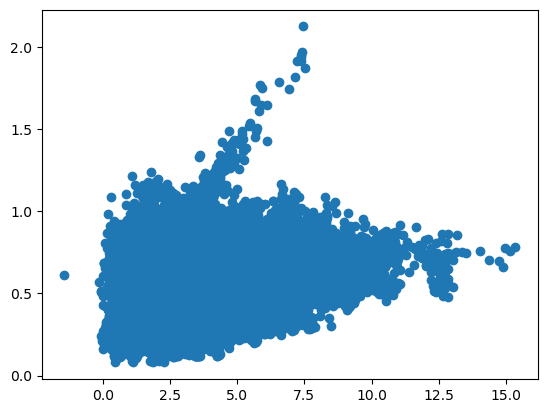

In [98]:
plt.scatter(final_metric_data[final_metric_data['variable'] == 'tas']['end_anomaly'], final_metric_data[final_metric_data['variable'] == 'tas']['iasd'])

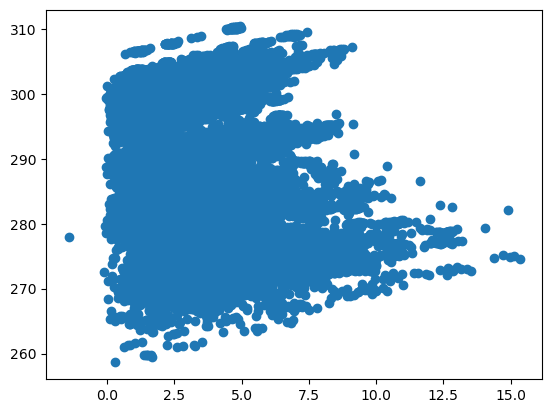

In [35]:
plt.scatter(final_metric_data[final_metric_data['variable'] == 'tas']['end_anomaly'], final_metric_data[final_metric_data['variable'] == 'tas']['end_val'])

In [99]:
# Save output
metric_output_path = '/Users/prim232/gitrepos/stitches_in_r/R/inst/shinyApp/python_curation/extracted_timeseries/extracted_metrics'
final_metric_data.to_csv(os.path.join(metric_output_path, 'IPCC_land_regions_metrics.csv'), index=False)